# Final Project - Module 07

 Use data analysis techniques and linear regression to create a model to predict housing prices.

# Model to Predict Housing Prices 
**Lígia D'Ávila Bozzi**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract
This project uses data analysis and linear regression techniques to create a real estate price prediction model.
Therefore, there target variable is the 'SalePrice' and the other selected variables are predictors.

For this project it is extremely important to understand the correlation between the predictor variables and the target variable (SalePrice). So, the correlation heatmap was plotted for all predictor variables, but we chose only variables with a correlation of approximately 50%. Because we believe that it will significantly influence the calculation of the r-squared. With that the data were prepared to then build our model. 

The result of the model built for the trained data (houseSmallData.csv) was an R-squared of 88% and for the test data (jtest.csv) the model had an r-squared of 75%.

[Back to top](#Index)


## 1. Introduction

This project use data analysis techniques and linear regression to create a model to predict housing prices.
The target variable (Y) is: Salce Price. 

**STEPS TO CONSTRUCT REGRESSION MODEL**
- IMPORTS AND READ
    - Import the data (houseSmallData.csv) and the libraries
    - Read the csv and verify shape
- DESCRIBE SALEPRICE
- DATA EXPLORATION
    - plot histogram (SalePrice); 
    - calculate skew, 
    - calculate log skew, 
    - plot histogram log SalePrice
- PLOT CORRELATION BETWEEN SALE PRICE AND PREDICTORS VARIABLES
- DATA PREPARATION
    - Verify if columns has nulls and NaN value
    - Repair all nulls
- CORRELATION
    - Select TOP 20 predictors variables. 
    - Plot correlation graphs with SalePrice
- LINEAR REGRESSION
    - Construct linear regression model  and fit model. 
    - Train the model
    - Calculate R-squared. 
    - Plot Scatter Predictors x Y. 
- ANALYSIS
    - Analysis the construct model with other models
- TEST MODEL
    - Import the data test (jtest.csv)
    - Verify the constructed model against test data

The first step was to import the data: 'houseSmallData.csv' and the libraries needed to analyze the data and create the models. Then the data of 'SalePrice' was described and executed carefully to understand its values and then build the regression model. 

For this project it is extremely important to understand the correlation between the predictor variables and the target variable (SalePrice). We calculated correlation numeric predictors variables and then we select those that we consider best to build the regression model. Finally, we calculated de r-squared and test model with other datas (jtest.csv, that didn't contain the SalePrice). 



[Back to top](#Index)

## 2. The Data

Resume the data: 
- **OverallQual:** Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
- **GrLivArea**: Above grade (ground) living area square feet
- **GarageArea**: Size of garage in square feet
- **GarageCars**: Size of garage in car capacity
- **YearBuilt**:  Year built
- **TotalBsmtSF**: Total square feet of basement area
- **FullBath**: Full bathrooms above grade
- **MasVnrArea**:  Masonry veneer type
       BrkCmn	 Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       None 	  None
       Stone	  Stone
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **1stFlrSF**: First Floor square feet
- **YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions) 
- **LotArea**: Lot size in square feet
- **Fireplaces**:  Number of fireplaces

[Back to top](#Index)

### 2.1 Import the Data and the libraries

Import the necessary libraries and the data for the project.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

#### Read the csv and verify shape

In [5]:
data = pd.read_csv('./data/houseSmallData.csv')
train = data
train.shape

(100, 82)

#### Describe SalePrice

In [6]:
salePrice = train['SalePrice']
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

The SalePrice have mean around **173,820** and standard deviation around +/- 72,236 (101,584 < x < 246,056)


[Back to top](#Index)

### 2.2 Data Exploration

### Plot histrogram - Sale Price

The histogram of SalPrice was plot for analysis this dependent variable:

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

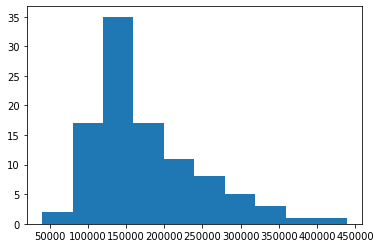

In [7]:
plt.hist(salePrice)

It's not normally distributed, it's fairly skewed. The calculate of skew show below:

#### Skew 
obs. The function skew() returns unbiased skew over the requested axis.

In [8]:
salePrice.skew()

1.1783462304851948

The original data had a skew of 1.17, which is quite significant. But the log of this is: 

In [9]:
np.log(salePrice).skew()

-0.09632240207755555

(array([ 1.,  0.,  3.,  7., 21., 26., 18., 13.,  9.,  2.]),
 array([10.59663473, 10.8361466 , 11.07565847, 11.31517034, 11.55468221,
        11.79419408, 12.03370595, 12.27321782, 12.51272969, 12.75224156,
        12.99175343]),
 <BarContainer object of 10 artists>)

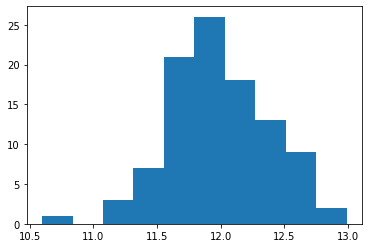

In [10]:
plt.hist(np.log(salePrice))

The slope is 0.09. And the log plot histogram SalePrice looks like more normaly distributed.
It's reduced considerably from more than one to just about 0.1. So let's transform it, and let's target the sales price data log. So this is our new sales price data. 

In [11]:
target = np.log(salePrice)

### Plot Correlation between Sales Price and predictors variables

The correlaction between Sale Price and dependent variables was plot for analysis which variables can be more correlation with SalePrice. Correlation is not causalidade. 

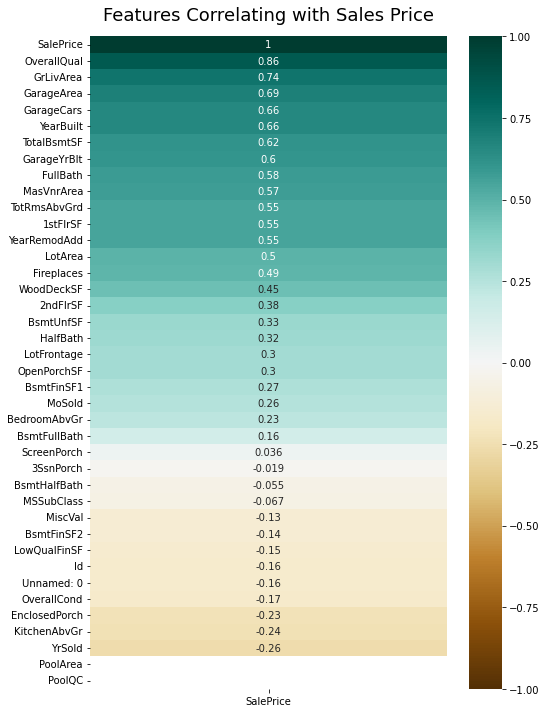

In [12]:
numeric = data.select_dtypes(include=[np.number])
corr = numeric.corr()
df_cols = pd.DataFrame(corr['SalePrice'].sort_values(ascending=False))

import seaborn as sns
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_cols, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

Acoording with graph below OverallQual and GrLivArea are more positive correlation with SalePrice. Enquanto OverallQual parece contribuir 86% com o SalePrice, GrLivArea parece contribuir em 74%

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. 


 #### Verify if columns has  null values

In [13]:
nulls = train.isnull().sum().sort_values(ascending=False)[0:20]
nulls

PoolQC          100
Alley            94
MiscFeature      91
Fence            77
FireplaceQu      54
LotFrontage      14
GarageType        6
GarageYrBlt       6
GarageFinish      6
GarageQual        6
GarageCond        6
BsmtFinType1      3
BsmtQual          3
BsmtCond          3
BsmtExposure      3
BsmtFinType2      3
KitchenAbvGr      0
Functional        0
BedroomAbvGr      0
HalfBath          0
dtype: int64

According to the result  above, there is quite a few nulls. The pool has 100, Alley has 94. This certainly shouldn't be analyzing.

The construction of the linear regression model correlate the variables as a number, therefore shouldn't be analyzing variables that has NaN or Null values.

#### Repair all nulls
Operate on the training data to select the data types that np.number, interpolate to fill NaN values, remove missing and select datas that the sum of null values is non-zero. 

In [14]:
data = train.select_dtypes(include=(np.number)).interpolate().dropna(axis=1)
sum(data.isnull().sum() != 0)

data.shape

(100, 39)

**39 columns** were filtered according to the criteria set out above.

[Back to top](#Index)

### 2.4 Correlation

Top 20 correlations with SalePrice were selected to start the correlation analysis.

In [15]:
numeric = data.select_dtypes(include=[np.number])
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:20]

Correlations with values close to 0.5 were chosen because the correlation is approximately equal to or greater than 50% (half). It is worth mentioning that correlations do not mean causality.

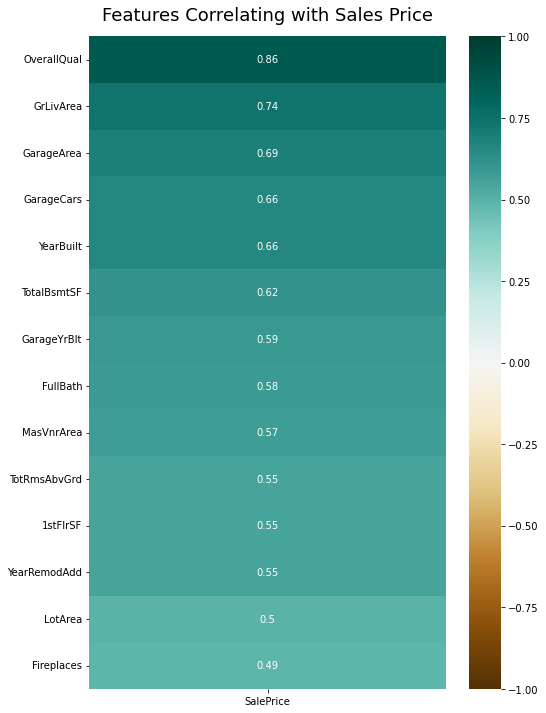

In [16]:
df_cols = pd.DataFrame(corr['SalePrice'].sort_values(ascending=False)[1:15])

import seaborn as sns
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_cols, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [17]:
cols = corr['SalePrice'].sort_values(ascending=False)[0:15]
cols = corr['SalePrice'].sort_values(ascending=False)[0:15].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces'],
      dtype='object')

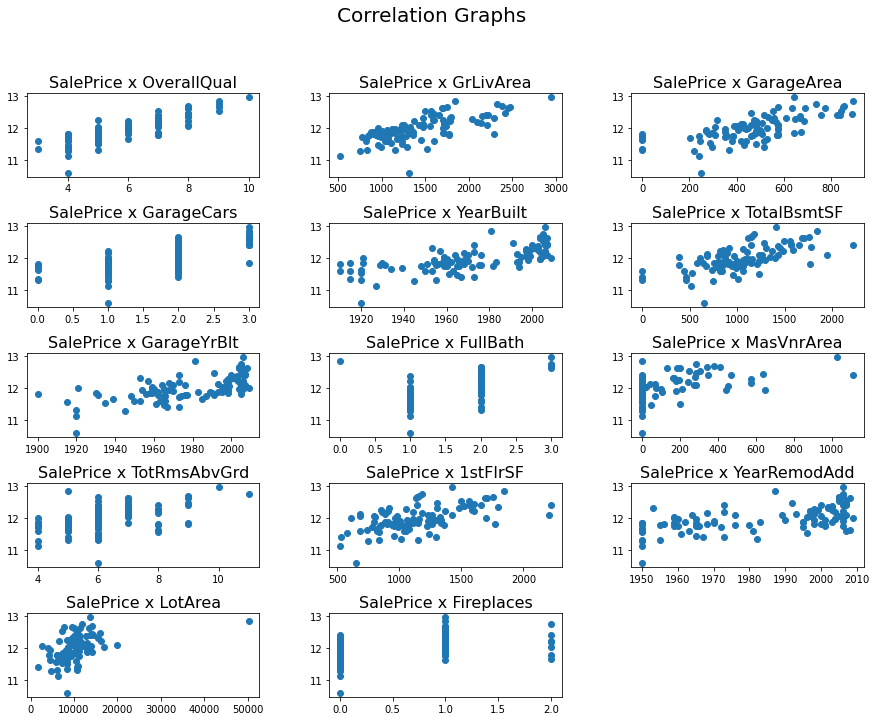

In [18]:
plt.figure(figsize = ((15, 15)))

plt.subplot(7, 3, 1)
plt.title("SalePrice x OverallQual", fontsize = 16)
plt.scatter(train['OverallQual'], y=target)

plt.subplot(7, 3, 2)
plt.title("SalePrice x GrLivArea", fontsize = 16)
plt.scatter(train['GrLivArea'], y=target)

plt.subplot(7, 3, 3)
plt.title("SalePrice x GarageArea", fontsize = 16)
plt.scatter(train['GarageArea'], y=target)

plt.subplot(7, 3, 4)
plt.title("SalePrice x GarageCars", fontsize = 16)
plt.scatter(train['GarageCars'], y=target)

plt.subplot(7, 3, 5)
plt.title("SalePrice x YearBuilt", fontsize = 16)
plt.scatter(train['YearBuilt'], y=target)

plt.subplot(7, 3, 6)
plt.title("SalePrice x TotalBsmtSF", fontsize = 16)
plt.scatter(train['TotalBsmtSF'], y=target)

plt.subplot(7, 3, 7)
plt.title("SalePrice x GarageYrBlt", fontsize = 16)
plt.scatter(train['GarageYrBlt'], y=target)

plt.subplot(7, 3, 8)
plt.title("SalePrice x FullBath", fontsize = 16)
plt.scatter(train['FullBath'], y=target)

plt.subplot(7, 3, 9)
plt.title("SalePrice x MasVnrArea", fontsize = 16)
plt.scatter(train['MasVnrArea'], y=target)

plt.subplot(7, 3, 10)
plt.title("SalePrice x TotRmsAbvGrd", fontsize = 16)
plt.scatter(train['TotRmsAbvGrd'], y=target)

plt.subplot(7, 3, 11)
plt.title("SalePrice x 1stFlrSF", fontsize = 16)
plt.scatter(train['1stFlrSF'], y=target)

plt.subplot(7, 3, 12)
plt.title("SalePrice x YearRemodAdd", fontsize = 16)
plt.scatter(train['YearRemodAdd'], y=target)

plt.subplot(7, 3, 13)
plt.title("SalePrice x LotArea", fontsize = 16)
plt.scatter(train['LotArea'], y=target)

plt.subplot(7, 3, 14)
plt.title("SalePrice x Fireplaces", fontsize = 16)
plt.scatter(train['Fireplaces'], y=target)

plt.suptitle("Correlation Graphs", fontsize = 20)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.55)
plt.show()

In [19]:
nan = train['GarageYrBlt'].isna().sum()
print(f'GarageYrBlt has {nan} not a numbers')

GarageYrBlt has 6 not a numbers


GarageYrBlt has 6 not a numbers and it's impossible to test a model with NaN values. So GarageYrBlt drop to X in test and train datas. 

In [20]:
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice', 'GarageYrBlt'],axis=1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,FullBath,MasVnrArea,TotRmsAbvGrd,1stFlrSF,YearRemodAdd,LotArea,Fireplaces
0,7,1710,548,2,2003,856,2,196.0,8,856,2003,8450,0
1,6,1262,460,2,1976,1262,2,0.0,6,1262,1976,9600,1
2,7,1786,608,2,2001,920,2,162.0,6,920,2002,11250,1
3,7,1717,642,3,1915,756,1,0.0,7,961,1970,9550,1
4,8,2198,836,3,2000,1145,2,350.0,9,1145,2000,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,2,68.0,6,680,1993,9765,1
96,7,1588,472,2,1999,1588,2,183.0,6,1588,1999,10264,0
97,4,960,432,1,1965,960,1,48.0,6,960,1965,10921,0
98,5,835,366,1,1920,458,1,0.0,5,835,1950,10625,0



[Back to top](#Index)

## 3. Project Description

This project use data analysis techniques and linear regression to create a model to predict housing prices. Therefore, the target variable is: "SalePrice" the other variables are predictors. 
In this project we were challenged to improve a model presented in which the R-squared was 0.8309859964337736 and for the test it was 0.7403341313192586, in this model 5 predictor variables were selected.
According to our analyses, we selected 13 numeric predictors variables that had a correlation of up to 50% with SalePrice, as we believe that these correlation indices result in a model with a high r-square.
The variables that we used was: 
- **OverallQual:** Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
- **GrLivArea**: Above grade (ground) living area square feet
- **GarageArea**: Size of garage in square feet
- **GarageCars**: Size of garage in car capacity
- **YearBuilt**:  Year built
- **TotalBsmtSF**: Total square feet of basement area
- **FullBath**: Full bathrooms above grade
- **MasVnrArea**:  Masonry veneer type
       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **1stFlrSF**: First Floor square feet
- **YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions) 
- **LotArea**: Lot size in square feet
- **Fireplaces**:  Number of fireplaces

For more description you can access the file: 'data_description.txt'

Then we applied these algorithms to construct the regression model:

<img src='./img/algorithm_lr.png' width='500'>

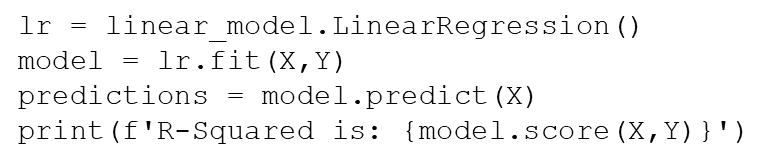

[Back to top](#Index)

### 3.1 Linear Regression

A regression study essentially seeks to **associate a variable Y (called the response variable or dependent variable) to another variables X (called the explanatory/predictions variables or independent variables).**

**Y → TARGET VARIABLE (output)**

**X → PREDICTORS VARIABLES (input)**

There are two types of linear regression: simple and multiple.

These datas has multiple sets of data are used to make the prediction, because of these the type of the linear regression is multiple. 

The equation for multiple linear regression becomes:

<img src='./img/eq_multiple_lr.png' width='250'>

Where x1, x2, xn  represent the data points of all the independent variables used to make the prediction, m1, m2, mn are the weights, b is the bias and e is the error.
By the method of least squares it is possible to predict the values of m and b:

<img src='./img/predict_values.png' width='80'>

The idea is that by minimizing the residual sum of squares we find m and b that will have the smallest difference between the prediction and the actually observed.

<img src='./img/small_dif.png' width='300'>

Error minimization is achieved by differentiating S(m,b) with respect to m and b using the chain rule and then setting it to zero.

<img src='./img/error.png' width='200'>

First expression: 

<img src='./img/first_eq.png' width='250'>

Second expression: 

<img src='./img/second_eq.png' width='250'>

Dividing and distributing the first expression by 2n:

<img src='./img/div.png' width='300'>

where 

<img src='./img/leg.png' width='170'>

Substituting this result into the second expression:

<img src='./img/subst_second.png' width='300'>

#### Calculate R-squared

<img src='./img/r_squared.png' width='200'>

where:

<img src='./img/leg_error.png' width='200'>

Normalizing the equation above: 

<img src='./img/normal.png' width='200'>
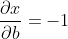
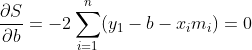
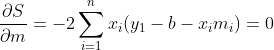
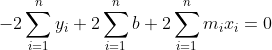
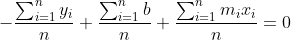
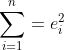
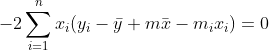
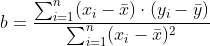
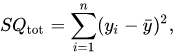
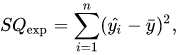
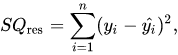
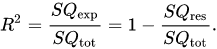
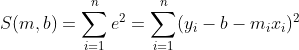
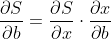
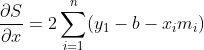

In [21]:
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
print(f'R-Squared is: {model.score(X,Y)}')

R-Squared is: 0.8800453086074875


In other words, 88% of the 'SalePrice' is already being predicted from those variables

(array([ 1.,  0.,  5., 23., 22., 31.,  8.,  9.,  0.,  1.]),
 array([-84599.97882017, -67332.45485965, -50064.93089913, -32797.40693861,
        -15529.88297809,   1737.64098243,  19005.16494295,  36272.68890347,
         53540.21286399,  70807.73682451,  88075.26078503]),
 <BarContainer object of 10 artists>)

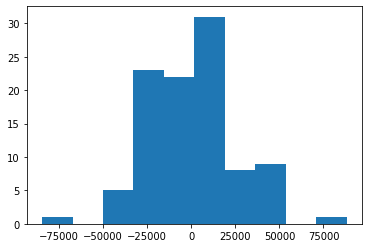

In [22]:
plt.hist(Y-predictions)

And we can take a look now at predictions. Perfect! 'Y' minus 'y' predictions should look like a normal distribution. And it does. Let's take a look at the scatter plot. That looks pretty good. Should look like a straight line. That looks very good indeed.

Text(0.5, 1.0, 'Y x Predictions')

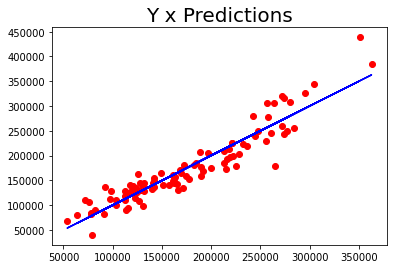

In [23]:
plt.scatter(predictions, Y, color='r')
m, b = np.polyfit(predictions, Y, 1)
plt.plot(predictions, m*predictions+b, color='b')
plt.title("Y x Predictions", fontsize=20)

[Back to top](#Index)

### 3.2 Analysis 
The analysis was performed with three models of linear variables, each with a number of variable variables. Below is a summary of key data from these analyses.


### Fisrt Model

In [24]:
cols1 = corr['SalePrice'].sort_values(ascending=False)[0:6].index
X1 = data[cols1]
Y1 = X1['SalePrice']
X1 = X1.drop(['SalePrice'],axis=1)
lr = linear_model.LinearRegression()
model = lr.fit(X1,Y1)
predictions = model.predict(X1)
print(f'R-Squared is: {model.score(X1,Y1)}')

R-Squared is: 0.8309859964337732


**Test Model**

In [26]:
test = pd.read_csv('./data/jtest.csv')
test.head()

X1 = test[cols1]
Y1 = X1['SalePrice']
X1 = X1.drop(['SalePrice'], axis=1)

predictions = model.predict(X1)
print(f'R^2 is: {model.score(X1,Y1)}')

R^2 is: 0.7403341313192588


--- 
### Second Model

In [28]:
cols2 = corr['SalePrice'].sort_values(ascending=False)[0:9].index
X2 = data[cols2]
Y2 = X2['SalePrice']
X2 = X2.drop(['SalePrice','GarageYrBlt' ],axis=1)
lr = linear_model.LinearRegression()
model = lr.fit(X2,Y2)
predictions = model.predict(X2)
print(f'R-Squared is: {model.score(X2,Y2)}')

R-Squared is: 0.8505906585270374


**Test Model**

In [29]:
test = pd.read_csv('./data/jtest.csv')
test.head()

X2 = test[cols2]
Y2 = X2['SalePrice']
X2 = X2.drop(['SalePrice', 'GarageYrBlt'], axis=1)

predictions = model.predict(X2)
print(f'R^2 is: {model.score(X2,Y2)}')

R^2 is: 0.7591746252173406


---
### Third Model

In [ ]:
cols3 = corr['SalePrice'].sort_values(ascending=False)[0:12].index
X3 = data[cols3]
Y3 = X3['SalePrice']
X3 = X3.drop(['SalePrice','GarageYrBlt' ],axis=1)
lr = linear_model.LinearRegression()
model = lr.fit(X3,Y3)
predictions = model.predict(X3)
print(f'R-Squared is: {model.score(X3,Y3)}')

R-Squared is: 0.8516019286804777


In [ ]:
cols3

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF'],
      dtype='object')

**Test Model**

In [ ]:
test = pd.read_csv('jtest.csv')
test.head()

X3 = test[cols3]
Y3 = X3['SalePrice']
X3 = X3.drop(['SalePrice', 'GarageYrBlt'], axis=1)

predictions = model.predict(X3)
print(f'R^2 is: {model.score(X3,Y3)}')

R^2 is: 0.7569646119281211


--- 
### The best model that are expose above: 

    

In [ ]:
cols = corr['SalePrice'].sort_values(ascending=False)[0:15].index
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice','GarageYrBlt' ],axis=1)
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
print(f'R-Squared is: {model.score(X,Y)}')

R-Squared is: 0.8800453086074878


In [ ]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces'],
      dtype='object')

**Test Model:** the test will be explained below

[Back to top](#Index)

### 3.3 Results

The best model is the one with the greatest number of variables. We chose to only select variables that had a correlation equal to or close to 0.5.

The predictors variables for the chosen model were:

'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'MasVnrArea',        'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces'. 

**The results show that this variables being predict 88% of the 'SalePrice'.**

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

The model will test against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

In [ ]:
test = pd.read_csv('jtest.csv')
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [ ]:
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice', 'GarageYrBlt'], axis=1)


In [ ]:
predictions = model.predict(X)
print(f'R-Squared is: {model.score(X,Y)}')

R-Squared is: 0.7552304204494396


As we can see, the chosen model obtained an r-squared of approximately 88% when training it with the known data. For unknown data, the r-squared was approximately 75%, which indicates that the chosen model is good for predicting the sale price.

[Back to top](#Index)

## Conclusion

According to the analyses, we can observe that the greater the number of numerical dependent variables selected, the greater the R-squared of the model and it is also observed for the test. However, it is important to prepare the data, as noted it was not possible to calculate the test when there were NaN values for GarageYrBlt and therefore this variable was removed from the analyses.
The r-squared factor of the model is extremely important to verify if the model is good, but it is not the only one that we must analyze, it is also important to test our model with new data and analyze which r-squared is. The model will be better the larger the r-squared for both cases. 
It is important to emphasize that correlation does not imply causality, that is, the dependent variable can explain the independent variable, but the opposite is not valid. Additionally, a single dependent variable may not be the only factor that explains the independent variable, there may be other variables.


[Back to top](#Index
)
## References

- Mendes, Daniel. “Data Science Academy.” Machine Learning. Brazil, 2022. https://www.datascienceacademy.com.br/course/machine-learning-engineer.

- Hunter, John; Dale, Darren; Firing, Eric; Droettboom, Michael "Matplotlib 3.5.1 documentation", Matplotlib. https://matplotlib.org/stable/index.html

